In [2]:
# !pip install sounddevice

In [4]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.linalg import toeplitz, solve_toeplitz
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
fs = 16000  # Sample rate
seconds = 2  # Duration of recording

# Recording Audio Signal

In [6]:
# Uncomment code to record Audio

# myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
# sd.wait()  # Wait until recording is finished
# write('yes4.wav',fs, myrecording) # Save as WAV file 

# Listen to Audio Signal and Plot

Duration of Audio in Seconds 2.0
Duration of Audio in Minutes 0.03333333333333333


ValueError: x and y must have same first dimension, but have shapes (32000,) and (26209,)

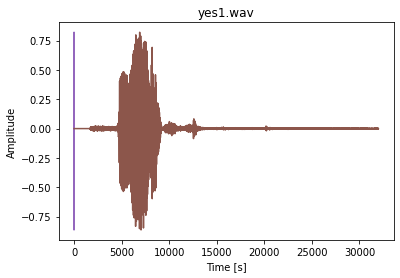

In [11]:
# Duration of the audio in Seconds
duration = len(data)/fs
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)
time = np.arange(0,duration,1/fs)

for i in range(1,5):
    fs, data = read('no{}.wav'.format(i))
    sd.play(data, fs)
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('no{}.wav'.format(i))
#     plt.plot(data)

for i in range(1,5):
    fs, data = read('yes{}.wav'.format(i))
    sd.play(data, fs)
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('yes{}.wav'.format(i))
    plt.plot(data)

# 3. Creating frames (with windowing) from signal and then creating Toeplitz matrix

In [19]:
def create_Window(data, frame_size, p):
    length_of_audio = len(data)

    print('Length of Audio File: ', length_of_audio)
    start = 0
    end = 0
    counter = 0
    sums = []
    toeplitz_rnm = []
    while end < length_of_audio:
        end = start + frame_size
        if end > length_of_audio:
            end = length_of_audio
#         print(start, end)
        chunk = data[start:end]
#     chunk is an n-D array containing 240 cols(frame size) 
#         print(chunk.tolist()) # convert each row in the form of comma separated list
#         print(chunk[0]) # this print first element of any chunk/window

        filename = f'splitaudio/chunk{counter}.wav'
        # Get Sum of 'Square of every element' of Window/Chunk
        sums.insert(counter, np.sum(np.square(chunk)))
        counter += 1
        start = end - frame//3
        toeplitz_rnm.append(Toeplitz_Matrix(end, chunk, p))
#     return 
        
def Toeplitz_Matrix(end, chunk, p):
    # Toeplitz Matrix
    rnm = []
    for i in range(0, p+1):
        summation = 0
        j = 0
        while end != 32000 and j+i < 240:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        if end == 32000 and j+i < 160:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        rnm.insert(i, summation)

#     print('Toeplitz....',len(toeplitz_rnm))
    print('\n************** Toeplitz Matrix of Current Window **************\n')
    toeplitz_matrix = toeplitz(np.array(rnm))
    print(toeplitz_matrix[:-1])
    return toeplitz_matrix

# 4. Solving the Toeplitz matrix using Durbin's algorithm

In [12]:
def Find_predictive_coeeficients(i):
    toeplitz_matrix = toeplitz(np.array(i)[:12],np.array(i)[:12])
    vector = np.array(i)[1:]
#     vector_b = vector.transpose()
    print('T:',toeplitz_matrix[0])
    print('b:',vector_b)
    ai = solve_toeplitz((toeplitz_matrix[0],toeplitz_matrix[0]), vector)
#     print(round(ai[0],6))
    # Verification using Numpy system of linear scalar equations.
#     az = np.linalg.solve(toeplitz_matrix, vector)
#     print(az)
    return ai


# 5. Finding Cepstral coefficients from LPC coefficients and applying the "raised sine window"

c0 = log(sigma)**2

cm = am + (from k = 1 to m-1)[sum(k/mckam-k)], where 1<= m<=p

cm = (from k = 1 to m-1)[sum(k/mckam-k)], where m>p

In [13]:
def find_cepstral_coefficients(a_i):
    ceps_coeff = []
    c0 = np.var(a_i)
    ceps_coeff.insert(0, c0)
    for m in range(1, p+1):
        sum = a_i[m-1]
#         print('ai:',ai[m-1])
        for k in range(1, m):
            if k>=0 and m-k > 0 :
                sum += 1/m*ceps_coeff[k]*a_i[m-k-1]
        ceps_coeff.insert(m, sum)
#         print(ceps_coeff)
    return ceps_coeff

In [15]:
for i in toeplitz_matrix:
    a_i = Find_predictive_coeeficients(i)
    print('*********Predictive Coefficients:*********\n',a_i)
    Cepstral_coefficient = find_cepstral_coefficients(a_i)
    print('*********Cepstral Coefficients for Frame*********\n',Cepstral_coefficient)

NameError: name 'toeplitz_matrix' is not defined

# 6. Implementation of distance measures (only Tokhura distance)